In this notebook you will see the exploratory data analysis that I performed on the data.

In [3]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

%matplotlib inline

In [4]:
songs = pd.read_csv('datasets/all_lyrics_add_clean_lyrics_col')

In [6]:
songs.shape

(816, 8)

In [7]:
songs.isnull().sum()

song_writer                    0
song_name                      0
lyrics                         0
song_link                      0
american_songbook              0
disney_renaissance             0
clean_lyrics                   0
clean_lyrics_with_stopwords    0
dtype: int64

In [8]:
songs['american_songbook'].value_counts(normalize=True)

1    0.542892
0    0.457108
Name: american_songbook, dtype: float64

In [9]:
songs['disney_renaissance'].value_counts(normalize=True)

0    0.840686
1    0.159314
Name: disney_renaissance, dtype: float64

# Word count of songbooks

In [10]:
# Creating columns with Character and Word counts to see if there is any difference between the two
songs['char_count'] = songs['clean_lyrics'].map(len)
songs['word_count'] = songs['clean_lyrics'].map(lambda x:len(x.split()))

In [11]:
songs.head()

,song_writer,song_name,lyrics,song_link,american_songbook,disney_renaissance,clean_lyrics,clean_lyrics_with_stopwords,char_count,word_count
0,101 Dalmations,Kanine Krunchies,Kanine Krunchies can't be beat They make each ...,http://www.disneyclips.com/lyrics/lyricsdalmat...,0,0,kanine krunchies can't be beat they make each ...,kanine krunchies can t be beat they make each ...,371,66
1,101 Dalmations,Cruella De Vil,Cruella De Vil Cruella De Vil If she doesn't s...,http://www.disneyclips.com/lyrics/lyrics23.html,0,0,cruella de vil cruella de vil if she doesn't s...,cruella de vil cruella de vil if she doesn t s...,504,99
2,101 Dalmations,Dalmatian Plantation,We'll have a dalmatian plantation Where our po...,http://www.disneyclips.com/lyrics/lyrics88.html,0,0,we'll have a dalmatian plantation where our po...,we ll have a dalmatian plantation where our po...,162,25
3,A Goofy Movie,Stand Out,"Open up your eyes, take a look at me Get the p...",http://www.disneyclips.com/lyrics/lyricsgoofy....,0,0,open up your eyes take a look at me get the pi...,open up your eyes take a look at me get the pi...,1668,348
4,A Goofy Movie,On the Open Road,[Goofy:] Do ya need a break from modern livin'...,http://www.disneyclips.com/lyrics/lyricsgoofy3...,0,0,goofy do ya need a break from modern livin' do...,goofy do ya need a break from modern livin do ...,1768,353


In [12]:
# Dinsey has got more words on average!!
songs.groupby('american_songbook').mean()

,disney_renaissance,char_count,word_count
american_songbook,,,
0,0.348525,963.479893,190.997319
1,0.000000,831.920993,167.647856


In [13]:
songs.sort_values('word_count', ascending=False).head(20)

,song_writer,song_name,lyrics,song_link,american_songbook,disney_renaissance,clean_lyrics,clean_lyrics_with_stopwords,char_count,word_count
61,Beauty and the Beast,Belle Lyrics,\n BELLE\n\nLittle town It'...,https://www.lyricsfreak.com/b/beauty+and+the+b...,0,1,belle little town it's a quiet village ev'ry d...,belle little town it s a quiet village ev ry d...,3738,703
573,Lion King,The Madness Of King Scar Lyrics,"\n Zazu, why am I not loved...",https://www.lyricsfreak.com/l/lion+king/ + /l/...,0,1,zazu why am i not loved i am that rare and awe...,zazu why am i not loved i am that rare and awe...,2989,612
53,Beauty and the Beast,The Mob Song Lyrics,\n [Gaston:] The Beas...,https://www.lyricsfreak.com/b/beauty+and+the+b...,0,1,gaston the beast will make off with your child...,gaston the beast will make off with your child...,2997,581
55,Beauty and the Beast,Human Again Lyrics,"\n Lumiere\n\r\nHa ha, oui,...",https://www.lyricsfreak.com/b/beauty+and+the+b...,0,1,lumiere ha ha oui my friends the day we have w...,lumiere ha ha oui my friends the day we have w...,2930,558
423,Irving Berlin,Anything You Can Do Lyrics,\n Annie: Anything you can ...,https://www.lyricsfreak.com/i/irving+berlin/ +...,1,0,annie anything you can do i can do better i ca...,annie anything you can do i can do better i ca...,2600,552
811,Winnie the Pooh,The Backson Song,"[Owl:] It's a giant creature with a tail Here,...",http://www.disneyclips.com/lyrics/lyricswinnie...,0,0,owl it's a giant creature with a tail here i'l...,owl it s a giant creature with a tail here i l...,2814,550
656,Oscar Hammerstein,The Farmer And The Cowman Lyrics,\n Oh the farmer and the co...,https://www.lyricsfreak.com/o/oscar+hammerstei...,1,0,oh the farmer and the cowman should be friends...,oh the farmer and the cowman should be friends...,2879,546
583,Little Mermaid,Poor Unfortunate Souls Lyrics,\n URSULA\nThe only way to ...,https://www.lyricsfreak.com/t/the+little+merma...,0,1,ursula the only way to get what you want is to...,ursula the only way to get what you want is to...,2775,542
675,Oscar Hammerstein,If I Loved You Lyrics,\n Julie*But*\nsomehow I ca...,https://www.lyricsfreak.com/o/oscar+hammerstei...,1,0,julie but somehow i can see just exactly how i...,julie but somehow i can see just exactly how i...,2463,524
652,Oscar Hammerstein,Shall I Tell You What I Think Of You? Lyrics,\n Your servant! Your serva...,https://www.lyricsfreak.com/o/oscar+hammerstei...,1,0,your servant your servant indeed i'm not your ...,your servant your servant indeed i m not your ...,2685,512


# Sentiment Analysis

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [15]:
# From the Sentiment Analysis Local Lab Lesson
sia = SentimentIntensityAnalyzer()

for score in ['neg', 'neu', 'pos', 'compound']:
    songs[score] = songs['clean_lyrics'].apply(lambda text: sia.polarity_scores(text)[score])

songs.head()

,song_writer,song_name,lyrics,song_link,american_songbook,disney_renaissance,clean_lyrics,clean_lyrics_with_stopwords,char_count,word_count,neg,neu,pos,compound
0,101 Dalmations,Kanine Krunchies,Kanine Krunchies can't be beat They make each ...,http://www.disneyclips.com/lyrics/lyricsdalmat...,0,0,kanine krunchies can't be beat they make each ...,kanine krunchies can t be beat they make each ...,371,66,0.000,0.674,0.326,0.9819
1,101 Dalmations,Cruella De Vil,Cruella De Vil Cruella De Vil If she doesn't s...,http://www.disneyclips.com/lyrics/lyrics23.html,0,0,cruella de vil cruella de vil if she doesn't s...,cruella de vil cruella de vil if she doesn t s...,504,99,0.107,0.840,0.053,-0.7862
2,101 Dalmations,Dalmatian Plantation,We'll have a dalmatian plantation Where our po...,http://www.disneyclips.com/lyrics/lyrics88.html,0,0,we'll have a dalmatian plantation where our po...,we ll have a dalmatian plantation where our po...,162,25,0.000,0.851,0.149,0.6369
3,A Goofy Movie,Stand Out,"Open up your eyes, take a look at me Get the p...",http://www.disneyclips.com/lyrics/lyricsgoofy....,0,0,open up your eyes take a look at me get the pi...,open up your eyes take a look at me get the pi...,1668,348,0.026,0.883,0.091,0.9544
4,A Goofy Movie,On the Open Road,[Goofy:] Do ya need a break from modern livin'...,http://www.disneyclips.com/lyrics/lyricsgoofy3...,0,0,goofy do ya need a break from modern livin' do...,goofy do ya need a break from modern livin do ...,1768,353,0.079,0.807,0.114,0.9210


In [16]:
songs.sort_values('neg', ascending=False).head()

,song_writer,song_name,lyrics,song_link,american_songbook,disney_renaissance,clean_lyrics,clean_lyrics_with_stopwords,char_count,word_count,neg,neu,pos,compound
694,Pocahontas,Savages (Part 1) Lyrics,\n [Ratcliffe]\nWhat can yo...,https://www.lyricsfreak.com/p/pocahontas/ + /p...,0,1,ratcliffe what can you expect from filthy litt...,ratcliffe what can you expect from filthy litt...,1201,209,0.436,0.546,0.018,-0.9991
306,Harold Arlen,Ding-Dong! The Witch Is Dead Lyrics,\n Ding dong! The witch is ...,https://www.lyricsfreak.com/h/harold+arlen/ + ...,1,0,ding dong the witch is dead which old witch th...,ding dong the witch is dead which old witch th...,373,78,0.432,0.568,0.000,-0.9931
562,Lion King,Not One Of Us Lyrics,\n Deception\nDisgrace\nEvi...,https://www.lyricsfreak.com/l/lion+king/ + /l/...,0,1,deception disgrace evil as plain as the scar o...,deception disgrace evil as plain as the scar o...,853,169,0.361,0.613,0.026,-0.9958
56,Beauty and the Beast,How Long Must This Go On? Lyrics,\n Beast\n\nHow long must t...,https://www.lyricsfreak.com/b/beauty+and+the+b...,0,1,beast how long must this go on this cruel tric...,beast how long must this go on this cruel tric...,260,52,0.319,0.597,0.084,-0.9382
438,Irving Berlin,When I Lost You Lyrics,\n (musical intro)\nI lost ...,https://www.lyricsfreak.com/i/irving+berlin/ +...,1,0,musical intro i lost the sunshine and roses i ...,musical intro i lost the sunshine and roses i ...,380,75,0.292,0.609,0.099,-0.9325


# Looking at lyrics of sentiment analysis

In [17]:
songs.iloc[694]['lyrics']

"\n                    [Ratcliffe]\nWhat can you expect\nFrom filthy little heathens?\nTheir whole disgusting race is like a curse.\nTheir skin's a hellish red\nThey're only good when dead\nThey're vermin, as I said\nAnd worse\n\n[English Settlers]\nThey're savages! Savages!\n\n[Ratcliffe]\nBarely even human\n[English Settlers]\nSavages! Savages!\n\n[Ratcliffe]\nDrive them from our shore!\nThey're not like you and me\nWhich means they must be evil\nWe must sound the drums of war!\n\n[English Settlers]\nThey're savages! Savages!\nDirty redskin devils!\nNow we sound the drums of war!\n\n[Powhatan]\nThis is what we feared\nThe paleface is a demon\nThe only thing they feel at all is greed\n\n[Kekata]\nBeneath that milky hide\nThere's emptiness inside\n\n[Native Americans]\nI wonder if they even bleed?\nThey're savages! Savages!\nBarely even human\nSavages! Savages!\n\n[Powhatan]\nKillers at the core\n\n[Kekata]\nThey're different from us\nWhich means they can't be trusted\n\n[Powhatan]\nWe

In [18]:
songs.sort_values('pos', ascending=False).head()

,song_writer,song_name,lyrics,song_link,american_songbook,disney_renaissance,clean_lyrics,clean_lyrics_with_stopwords,char_count,word_count,neg,neu,pos,compound
730,Snow White,I'm Wishing,[Snow White]: Make a wish into the well That's...,http://www.disneyclips.com/lyrics/lyrics72.html,0,0,snow white make a wish into the well that's al...,snow white make a wish into the well that s al...,491,118,0.000,0.331,0.669,0.9988
115,Cole Porter,Paris Loves Lovers Lyrics,\n Gaze on the glistening l...,https://www.lyricsfreak.com/c/cole+porter//c/c...,1,0,gaze on the glistening lights below and above ...,gaze on the glistening lights below and above ...,946,161,0.056,0.440,0.504,0.9993
271,George Gershwin,'s Wonderful Lyrics,"\n Life has just begun,\nJa...",https://www.lyricsfreak.com/g/george+gershwin/...,1,0,life has just begun jack has found his jill do...,life has just begun jack has found his jill do...,474,93,0.044,0.480,0.477,0.9974
666,Oscar Hammerstein,Finale-Oh What A Beautiful Mornin' Lyrics,\n Oh what a beautiful morn...,https://www.lyricsfreak.com/o/oscar+hammerstei...,1,0,oh what a beautiful mornin' oh what a beautifu...,oh what a beautiful mornin oh what a beautiful...,130,24,0.000,0.526,0.474,0.9524
668,Oscar Hammerstein,Happy Land Lyrics,"\n ""There is a happy land, ...",https://www.lyricsfreak.com/o/oscar+hammerstei...,1,0,there is a happy land far far away where saint...,there is a happy land far far away where saint...,155,27,0.000,0.551,0.449,0.9442


In [19]:
songs.iloc[730]['lyrics']

"[Snow White]: Make a wish into the well That's all you have to do And if you hear it echoing Your wish will soon come true I'm wishing (I'm wishing) For the one I love To find me (To find me) Today (Today) I'm hoping (I'm hoping) And I'm dreaming of The nice things (The nice things) He'll say (He'll say) Ha ha ha ha ha (Ha ha ha ha ha) Ha ha ha ha ha (Ha ha ha ha ha) Ha ha ha ha ha (Ha ha ha ha ha) Ha ha ha ha ha ha ha ha ha I'm wishing (I'm wishing) For the one I love To find me (To find me) Today [Prince]: Today!"

In [20]:
songs.sort_values('compound', ascending=False).head()

,song_writer,song_name,lyrics,song_link,american_songbook,disney_renaissance,clean_lyrics,clean_lyrics_with_stopwords,char_count,word_count,neg,neu,pos,compound
156,Enchanted,That's How You Know,[Giselle:] How does she know you love her? How...,http://www.disneyclips.com/lyrics/lyricsenchan...,0,0,giselle how does she know you love her how doe...,giselle how does she know you love her how doe...,2052,435,0.010,0.728,0.262,0.9993
115,Cole Porter,Paris Loves Lovers Lyrics,\n Gaze on the glistening l...,https://www.lyricsfreak.com/c/cole+porter//c/c...,1,0,gaze on the glistening lights below and above ...,gaze on the glistening lights below and above ...,946,161,0.056,0.440,0.504,0.9993
61,Beauty and the Beast,Belle Lyrics,\n BELLE\n\nLittle town It'...,https://www.lyricsfreak.com/b/beauty+and+the+b...,0,1,belle little town it's a quiet village ev'ry d...,belle little town it s a quiet village ev ry d...,3738,703,0.061,0.726,0.213,0.9992
641,Oliver and Company,Streets of Gold,"Now listen up, you've got a lot to learn And i...",http://www.disneyclips.com/lyrics/lyrics116.html,0,0,now listen up you've got a lot to learn and if...,now listen up you ve got a lot to learn and if...,1629,329,0.009,0.700,0.291,0.9991
328,High School Musical,Stick to the Status Quo,You can bet there's nothing but net When I am ...,http://www.disneyclips.com/lyrics/stick-to-the...,0,0,you can bet there's nothing but net when i am ...,you can bet there s nothing but net when i am ...,1967,422,0.030,0.674,0.296,0.9990


In [21]:
songs.iloc[156]['lyrics']

'[Giselle:] How does she know you love her? How does she know she\'s yours? [Man:] How does she know that you love her? [Giselle:] How do you show her you love her? [Both:] How does she know that you really, really, truly love her? How does she know that you love her? How do you show her you love her? How does she know that you really, really, truly love her? [Giselle:] It\'s not enough to take the one you love for granted You must remind her, or she\'ll be inclined to say "How do I know he loves me?" (How does she know that you love her?) How do you show her you love her?) "How do I know he\'s mine?" (How does she know that you really, really, truly love her?) Well, does he leave a little note to tell you you are on his mind? Send you yellow flowers when the sky is grey? Hey! He\'ll find a new way to show you, a little bit every day That\'s how you know That\'s how you know He\'s your love [Man:] You\'ve got to show her you need her Don\'t treat her like a mind reader Each day do some

# Plotting Data

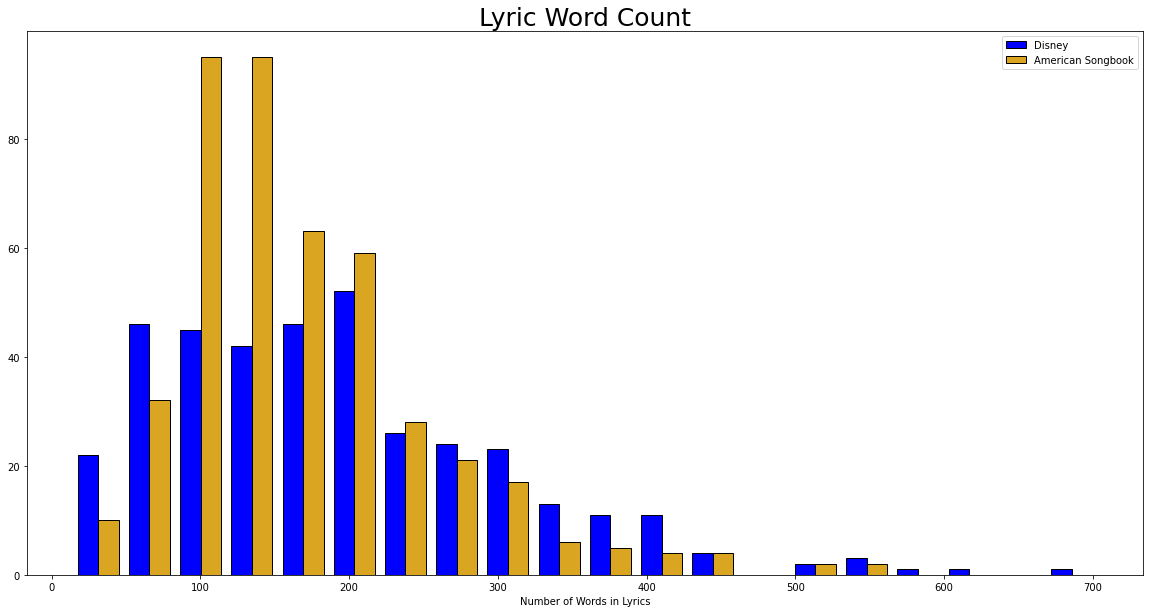

In [22]:
plt.figure(figsize=(20, 10))
plt.hist([songs[songs['american_songbook'] == 0]['word_count'],
          songs[songs['american_songbook'] == 1]['word_count']],
          bins=20, color=['blue', 'goldenrod'], ec='k')
plt.title('Lyric Word Count', fontsize=25)
plt.legend(['Disney', 'American Songbook'])
plt.xlabel('Number of Words in Lyrics');

#### Plotting Sentiment Analysis

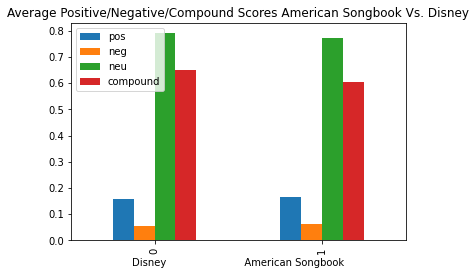

In [37]:
songs.groupby('american_songbook')[['pos', 'neg', 'neu', 'compound']].mean().plot(kind='bar')
plt.title('Average Positive/Negative/Compound Scores American Songbook Vs. Disney')
plt.xlabel('Disney' + (' ' * 25) + 'American Songbook');

In [41]:
# This function is taken from the local lab sentiment analysis
def plot_dist(df = songs, american_songbook = [0, 1], col = 'neg'):
    for lyrics in american_songbook:
        sns.distplot(df.loc[df['american_songbook'] == lyrics][col], hist=False, label=lyrics)
    plt.legend(['Disney', 'American Songbook'])
    plt.title(f'Distribution for {col} Lyrics')
    return plt.show();

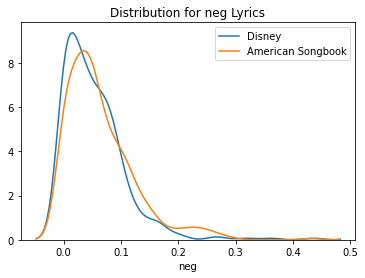

In [42]:
plot_dist()

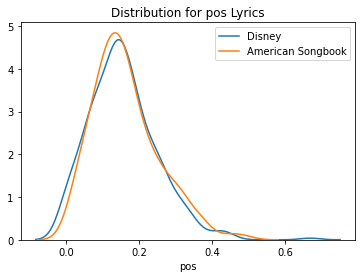

In [43]:
plot_dist(col='pos');

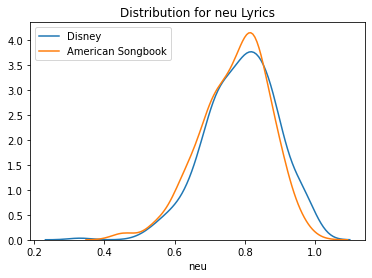

In [44]:
plot_dist(col='neu');

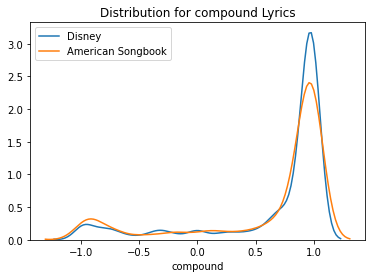

In [45]:
plot_dist(col='compound');

In [127]:
songs.to_csv('datasets/cleaned_lyrics_with_sentiment_analysis')

# Basic Model

This is just an initial test run on some modeling.

In [67]:
X = songs['clean_lyrics']
y = songs['american_songbook']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

In [68]:
# Checking my baseline
y_test.value_counts(normalize=True)

1    0.544118
0    0.455882
Name: american_songbook, dtype: float64

In [69]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression(max_iter=5000))
])

pipe_params = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [1, 2, 3 , 4],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)]
}

gs = GridSearchCV(pipe,
                  pipe_params,
                  cv=5)

In [70]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [71]:
gs.best_score_

0.7745168599226976

In [72]:
gs.score(X_test, y_test)

0.7745098039215687

In [73]:
gs.best_params_

{'cvec__max_df': 0.95,
 'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1)}

# Trying it on the stopword column

In [74]:
X = songs['clean_lyrics_with_stopwords_stopwords']
y = songs['american_songbook']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

In [75]:
# Checking my baseline
y_test.value_counts(normalize=True)

1    0.544118
0    0.455882
Name: american_songbook, dtype: float64

In [76]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression(max_iter=5000))
])

pipe_params = {
    'cvec__max_features': [2000, 3000, 4000, 5000],
    'cvec__min_df': [1, 2, 3 , 4],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)]
}

gs = GridSearchCV(pipe,
                  pipe_params,
                  cv=5)

In [77]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [78]:
gs.best_score_

0.7745168599226976

In [79]:
gs.score(X_test, y_test)

0.7745098039215687

In [80]:
gs.best_params_

{'cvec__max_df': 0.95,
 'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1)}